<a href="https://colab.research.google.com/github/YangHyunu/Signiture/blob/main/12_multi_nn_penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NN 다중분류
- 펭귄데이터 셋
  - 세 종의 펭귄을 분류하는게 목표

In [51]:
!pip install --q ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.1 s (started: 2024-07-07 12:48:57 +00:00)


In [52]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

time: 847 µs (started: 2024-07-07 12:49:10 +00:00)


## 1.데이터 준비

In [53]:
!wget https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv

--2024-07-07 12:49:10--  https://raw.githubusercontent.com/devdio/flyai_datasets/main/penguins.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13523 (13K) [text/plain]
Saving to: ‘penguins.csv.1’

penguins.csv.1      100%[===================>]  13.21K  --.-KB/s    in 0s      

2024-07-07 12:49:10 (80.8 MB/s) - ‘penguins.csv.1’ saved [13523/13523]

time: 110 ms (started: 2024-07-07 12:49:10 +00:00)


In [54]:
penguins = pd.read_csv('/content/penguins.csv')
penguins.shape

(344, 7)

time: 18.7 ms (started: 2024-07-07 12:49:10 +00:00)


In [55]:
df = penguins.copy()
df.head()

,Species,Island,Culmen Length(mm),Culmen Depth(mm),Flipper Length(mm),Body Mass(g),Sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 54 ms (started: 2024-07-07 12:49:10 +00:00)


  - 컬럼명 변경, 데이터의 전처리 필요!

In [56]:
# 컬럼 처리
df.columns = [col.lower().replace(' ', '_').replace('(', '_').replace(')', '')    for col in df.columns]
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


time: 51.6 ms (started: 2024-07-07 12:49:10 +00:00)


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
time: 14.9 ms (started: 2024-07-07 12:49:10 +00:00)


In [58]:
df.isna().sum() # na 값이 적어보이지만 실제로는 더 많을것으로 추정됨

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 6.25 ms (started: 2024-07-07 12:49:10 +00:00)


In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
culmen_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
culmen_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


time: 97 ms (started: 2024-07-07 12:49:10 +00:00)


### 범주형 변수

In [60]:
cols_cat = df.select_dtypes(include=['object'])
cols_cat.head(5)

,species,island,sex
0,Adelie,Torgersen,MALE
1,Adelie,Torgersen,FEMALE
2,Adelie,Torgersen,FEMALE
3,Adelie,Torgersen,NaN
4,Adelie,Torgersen,FEMALE


time: 25.5 ms (started: 2024-07-07 12:49:11 +00:00)


In [61]:
cols_cat['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

time: 14 ms (started: 2024-07-07 12:49:11 +00:00)


In [62]:
cols_cat['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

time: 21.4 ms (started: 2024-07-07 12:49:11 +00:00)


In [63]:
cols_cat['sex'].value_counts() # .이라는 이상값이 존재함

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 19 ms (started: 2024-07-07 12:49:11 +00:00)


In [64]:
# .이라는 이상값을 FEMALE로 변경
cols_cat.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
cols_cat['sex'].value_counts()

sex
MALE      168
FEMALE    166
Name: count, dtype: int64

time: 18.6 ms (started: 2024-07-07 12:49:11 +00:00)


In [65]:
df.loc[cols_cat['sex']=='.', 'sex'] = 'FEMALE'
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
.           1
Name: count, dtype: int64

time: 11.5 ms (started: 2024-07-07 12:49:11 +00:00)


### groupby 함수를 사용하여 각 섬별 펭귄 수를 볼 수 있다.
  - Torgersen 섬에는 Adelie 펭귄만 사는것 같다. 확인필요..

In [66]:
df.groupby('island')['species'].value_counts()

island     species  
Biscoe     Gentoo       124
           Adelie        44
Dream      Chinstrap     68
           Adelie        56
Torgersen  Adelie        52
Name: count, dtype: int64

time: 10.3 ms (started: 2024-07-07 12:49:11 +00:00)


### 연속형변수

In [67]:
cols_num = df.select_dtypes(include=['number'])
cols_num.head(5) # 역시 결측값이 존재한다.

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0


time: 28.3 ms (started: 2024-07-07 12:49:11 +00:00)


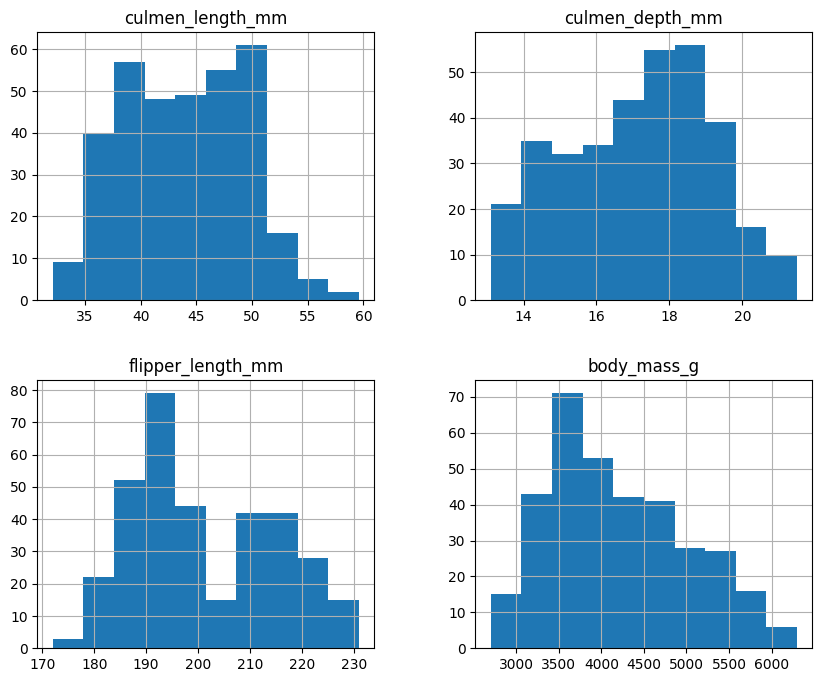

time: 2.07 s (started: 2024-07-07 12:49:11 +00:00)


In [68]:
cols_num.hist(figsize=(10, 8))
plt.show()

### 이상치

In [69]:
cols_num.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

time: 3.44 ms (started: 2024-07-07 12:49:13 +00:00)


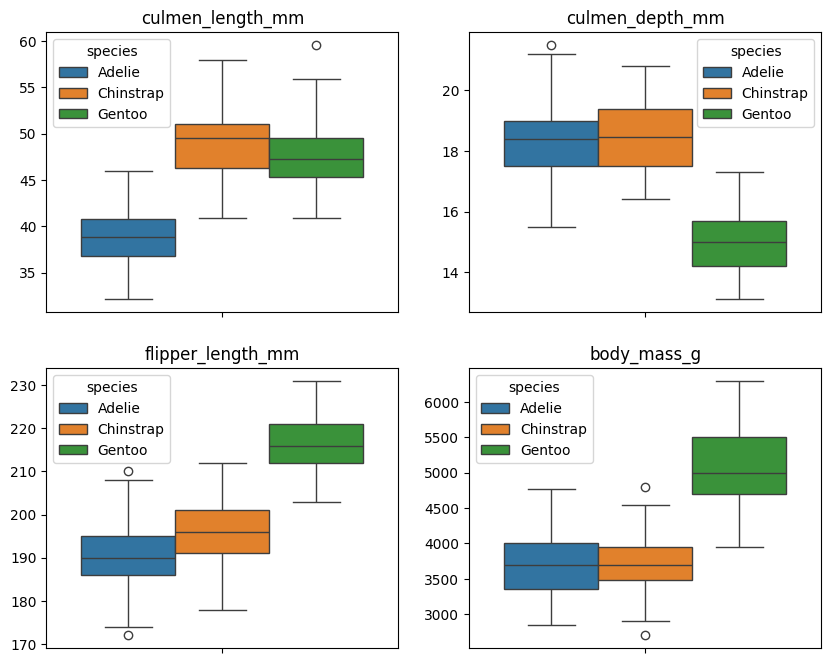

time: 1.95 s (started: 2024-07-07 12:49:13 +00:00)


In [70]:
# 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(cols_num.columns):
    sns.boxplot(y=col, data=cols_num, hue=df['species'], ax=axes[i])
    axes[i].set_xlabel(None)
    axes[i].set_ylabel(None)
    axes[i].set_title(col)

In [71]:
# 데이터 분리
# 결측치
# 인코딩
# 학습

time: 386 µs (started: 2024-07-07 12:49:15 +00:00)


## 2.트레인, 테스트 분리

In [72]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42, stratify=df['species']) # 각 종이 균형있게 할당되도록 함함

train.shape, test.shape

((275, 7), (69, 7))

time: 20 ms (started: 2024-07-07 12:49:15 +00:00)


### 결측치처리

In [73]:
train.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

time: 5.7 ms (started: 2024-07-07 12:49:15 +00:00)


- heatmap으로 결측값 확인 <흰색>이 결측값

<Axes: >

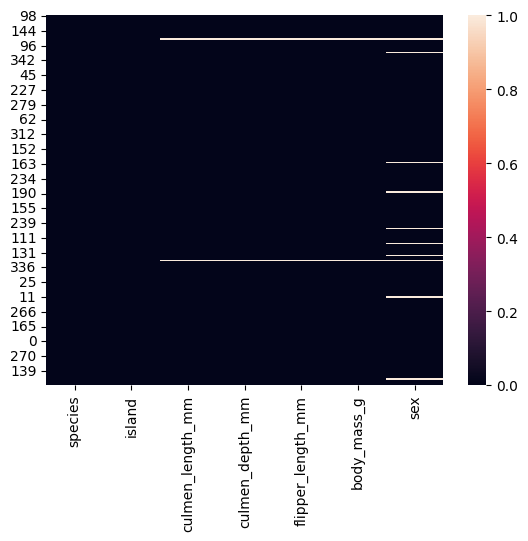

time: 975 ms (started: 2024-07-07 12:49:15 +00:00)


In [74]:
sns.heatmap(train.isna())

In [75]:
train = train.dropna() # 결측값이 많지 않아 그냥 드랍시킴

time: 2.32 ms (started: 2024-07-07 12:49:16 +00:00)


### X, y 분리

In [76]:
X_train = train.drop('species', axis=1)
y_train = train['species']

X_train.shape, y_train.shape

((265, 6), (265,))

time: 8.1 ms (started: 2024-07-07 12:49:16 +00:00)


In [77]:
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,Dream,33.1,16.1,178.0,2900.0,FEMALE
114,Biscoe,39.6,20.7,191.0,3900.0,FEMALE
118,Torgersen,35.7,17.0,189.0,3350.0,FEMALE
303,Biscoe,50.0,15.9,224.0,5350.0,MALE
343,Biscoe,49.9,16.1,213.0,5400.0,MALE


time: 63.4 ms (started: 2024-07-07 12:49:16 +00:00)


### 인코딩 <범주형 변수를 각 숫자로 매핑함>

In [78]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()

X_train[['island', 'sex']] = oe.fit_transform(X_train[['island', 'sex']])
X_train.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
98,1.0,33.1,16.1,178.0,2900.0,1.0
114,0.0,39.6,20.7,191.0,3900.0,1.0
118,2.0,35.7,17.0,189.0,3350.0,1.0
303,0.0,50.0,15.9,224.0,5350.0,2.0
343,0.0,49.9,16.1,213.0,5400.0,2.0


time: 53.1 ms (started: 2024-07-07 12:49:16 +00:00)


- 각 섬, 성별이 숫자로 매핑된것을 볼 수 있다.

### 레이블 인코딩
    만약 이진 분류라면 원-핫 인코딩 할 필요 없이 레이블 인코딩만 하면 됨

In [79]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_e = le.fit_transform(y_train)
y_train_e[:5]


array([0, 0, 0, 2, 2])

time: 9.37 ms (started: 2024-07-07 12:49:16 +00:00)


### 스케일링

In [80]:
X_train.describe()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,265.00000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,0.65283,44.163396,17.183019,200.969811,4220.754717,1.501887
std,0.71790,5.499668,2.007084,13.911756,809.351941,0.508448
min,0.00000,33.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.00000,39.600000,15.600000,190.000000,3550.000000,1.000000
50%,1.00000,45.100000,17.300000,197.000000,4050.000000,2.000000
75%,1.00000,48.700000,18.800000,213.000000,4800.000000,2.000000
max,2.00000,59.600000,21.500000,231.000000,6300.000000,2.000000


time: 60.3 ms (started: 2024-07-07 12:49:16 +00:00)


In [81]:
from sklearn.preprocessing import RobustScaler

rs = RobustScaler()
X_train_s = rs.fit_transform(X_train)
X_train_s[:5]

array([[ 0.        , -1.31868132, -0.375     , -0.82608696, -0.92      ,
        -1.        ],
       [-1.        , -0.6043956 ,  1.0625    , -0.26086957, -0.12      ,
        -1.        ],
       [ 1.        , -1.03296703, -0.09375   , -0.34782609, -0.56      ,
        -1.        ],
       [-1.        ,  0.53846154, -0.4375    ,  1.17391304,  1.04      ,
         0.        ],
       [-1.        ,  0.52747253, -0.375     ,  0.69565217,  1.08      ,
         0.        ]])

time: 18 ms (started: 2024-07-07 12:49:16 +00:00)


## 3.모델 학습

- 다중 분류 문제에서 모델이 각 클래스의 확률을 출력하도록 학습하려면, 레이블을 원-핫 인코딩 형태로 변환해야 함

In [82]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train_e)
y_train_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

time: 7.85 ms (started: 2024-07-07 12:49:16 +00:00)


In [83]:
print(X_train_s.shape, y_train_o.shape)
print(type(X_train_s), type(y_train_o))


(265, 6) (265, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
time: 8.22 ms (started: 2024-07-07 12:49:16 +00:00)


In [84]:
X_train_s.shape

(265, 6)

time: 23.3 ms (started: 2024-07-07 12:49:16 +00:00)


In [85]:
from keras import layers

model = keras.Sequential([
    layers.Dense(units=16, activation='relu', input_shape=(6,)),
    layers.Dense(units=8, activation='relu'),
    layers.Dense(units=3, activation='softmax'),
])

time: 161 ms (started: 2024-07-07 12:49:17 +00:00)


In [86]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                112       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 3)                 27        
                                                                 
Total params: 275 (1.07 KB)
Trainable params: 275 (1.07 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
time: 82.8 ms (started: 2024-07-07 12:49:17 +00:00)


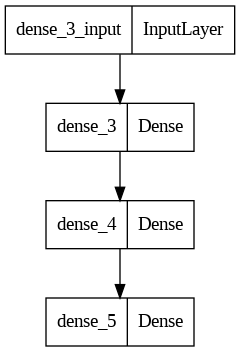

time: 153 ms (started: 2024-07-07 12:49:17 +00:00)


In [87]:
from keras import utils

utils.plot_model(model)

In [88]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

time: 38.5 ms (started: 2024-07-07 12:49:17 +00:00)


In [89]:
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(
    X_train_s, y_train_o,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.2
)


Epoch 1/100
14/14 [==============================] - 3s 51ms/step - loss: 1.1490 - accuracy: 0.4151 - val_loss: 1.0643 - val_accuracy: 0.4906
Epoch 2/100
14/14 [==============================] - 0s 17ms/step - loss: 1.0537 - accuracy: 0.4481 - val_loss: 0.9994 - val_accuracy: 0.5472
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.9711 - accuracy: 0.5472 - val_loss: 0.9342 - val_accuracy: 0.6038
Epoch 4/100
14/14 [==============================] - 0s 14ms/step - loss: 0.8920 - accuracy: 0.6840 - val_loss: 0.8707 - val_accuracy: 0.7547
Epoch 5/100
14/14 [==============================] - 0s 16ms/step - loss: 0.8160 - accuracy: 0.7406 - val_loss: 0.8059 - val_accuracy: 0.8113
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.7417 - accuracy: 0.7594 - val_loss: 0.7441 - val_accuracy: 0.7925
Epoch 7/100
14/14 [==============================] - 0s 10ms/step - loss: 0.6700 - accuracy: 0.7972 - val_loss: 0.6880 - val_accuracy: 0.7925
Epoch 8

### 학습과정 시각화

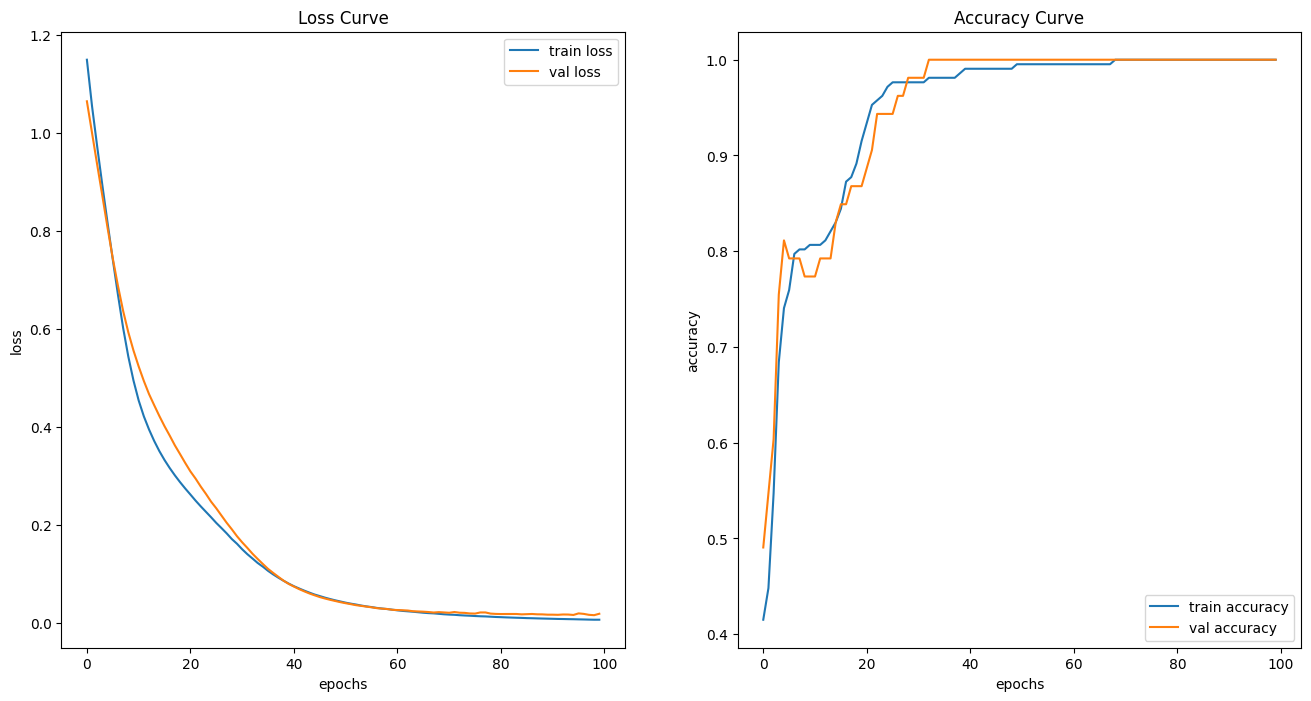

time: 1.16 s (started: 2024-07-07 12:49:43 +00:00)


In [90]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val accuracy')
    plt.title('Accuracy Curve')
    plt.legend()
    plt.show()

plot_history(history)

## 모델 평가

In [93]:
test.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

time: 15 ms (started: 2024-07-07 12:50:28 +00:00)


<Axes: >

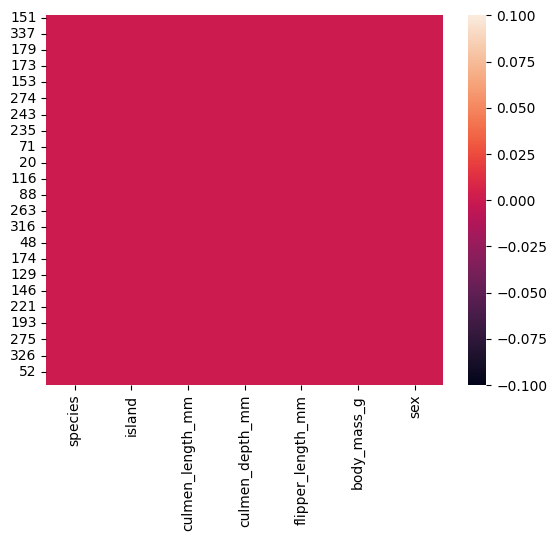

time: 1 s (started: 2024-07-07 12:51:03 +00:00)


In [94]:
sns.heatmap(test.isna())

In [95]:
# 평가 확인 (테스트 데이터 전처리를 ...)
X_test = test.drop('species', axis=1)
y_test = test['species']

time: 2.31 ms (started: 2024-07-07 12:51:09 +00:00)


In [96]:
X_test[['island', 'sex']] = oe.transform(X_test[['island', 'sex']])
X_test.head(5)

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
151,1.0,41.5,18.5,201.0,4000.0,2.0
1,2.0,39.5,17.4,186.0,3800.0,1.0
294,0.0,46.4,15.0,216.0,4700.0,1.0
337,0.0,48.8,16.2,222.0,6000.0,2.0
158,1.0,46.1,18.2,178.0,3250.0,1.0


time: 56.2 ms (started: 2024-07-07 12:51:36 +00:00)


In [97]:
X_test_s = rs.transform(X_test)
X_test_s[:5]

array([[ 0.        , -0.3956044 ,  0.375     ,  0.17391304, -0.04      ,
         0.        ],
       [ 1.        , -0.61538462,  0.03125   , -0.47826087, -0.2       ,
        -1.        ],
       [-1.        ,  0.14285714, -0.71875   ,  0.82608696,  0.52      ,
        -1.        ],
       [-1.        ,  0.40659341, -0.34375   ,  1.08695652,  1.56      ,
         0.        ],
       [ 0.        ,  0.10989011,  0.28125   , -0.82608696, -0.64      ,
        -1.        ]])

time: 10.1 ms (started: 2024-07-07 12:51:49 +00:00)


In [99]:
y_test_e = le.transform(y_test)
y_test_e[:5]

array([0, 0, 2, 2, 1])

time: 8.96 ms (started: 2024-07-07 12:52:09 +00:00)


In [100]:
y_test_o = to_categorical(y_test_e)
y_test_o[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

time: 15.4 ms (started: 2024-07-07 12:53:33 +00:00)


In [103]:
y_pred = model.predict(X_test_s)
y_pred[:10]

3/3 [==============================] - 0s 5ms/step


array([[9.9410784e-01, 5.3535705e-03, 5.3848693e-04],
       [9.9763989e-01, 2.2820844e-03, 7.7998578e-05],
       [1.6485634e-05, 9.5742545e-04, 9.9902600e-01],
       [1.0881725e-04, 1.2251617e-04, 9.9976873e-01],
       [3.2261221e-03, 9.9663115e-01, 1.4269138e-04],
       [9.8800898e-01, 1.0916235e-02, 1.0748772e-03],
       [1.0890720e-02, 9.8586899e-01, 3.2402219e-03],
       [6.2700725e-05, 4.6182028e-04, 9.9947542e-01],
       [3.0427361e-03, 9.9581456e-01, 1.1426290e-03],
       [1.3933275e-02, 9.8197663e-01, 4.0901159e-03]], dtype=float32)

time: 168 ms (started: 2024-07-07 12:54:27 +00:00)


In [104]:
import numpy as np

y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 2, 2, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 2, 2, 1, 2,
       2, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 1, 2,
       0, 0, 2])

time: 6.96 ms (started: 2024-07-07 12:54:30 +00:00)


In [105]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix

def print_metrics(y_true, y_pred, aver='binary'):
    print('accuracy:', accuracy_score(y_true, y_pred))
    print('recall:', recall_score(y_true, y_pred ,average=aver))
    print('precision:', precision_score(y_true, y_pred,average=aver))
    print('f1 :', f1_score(y_true, y_pred, average=aver))

    cfm = confusion_matrix(y_true, y_pred)
    s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
    s.set(xlabel='Prediction', ylabel='Actual')
    plt.show()

time: 1.58 ms (started: 2024-07-07 12:54:41 +00:00)


accuracy: 1.0
recall: 1.0
precision: 1.0
f1 : 1.0


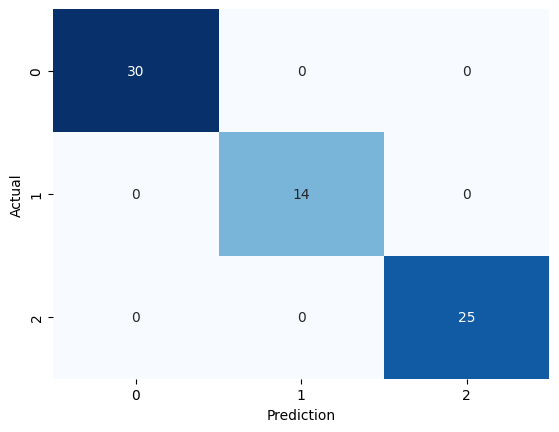

time: 314 ms (started: 2024-07-07 12:54:42 +00:00)


In [106]:
print_metrics(y_test_e, y_pred, aver='macro')

## 결론
  - 완벽한 분류가 돼었다;;;